In [64]:
# to compare the dm2nu changes

In [65]:
# imports
from constants import pdm_constants as const
from config import config
from pone_aeff import Aeff
from dm2nu import DM2Nu
from atm_shower import Atm_Shower
from detectors import Detector
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

from limit_calc import Limits
from bkgrd_calc import Background
from signal_calc import Signal
from pdm import PDM
from scipy.interpolate import UnivariateSpline
from scipy.stats import chi2
from scipy.stats import *
from pone_aeff import Aeff
import pickle
from matplotlib import rc
import pandas as pd
import os
import shutil
def find_nearest(array, value: float):
    
    """ Returns: index of the nearest vlaue of an array to the given number
    --------------
    idx :  float
    """
    array = np.array(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [66]:
# picture path
PICS = '../pics/'
name=[r'$\nu_{\mu}$', r"$\nu_e$", r"$\nu_{\tau}$"]  # ,r'$\nu_{e}$',r'$\nu_{\tau}$'
# Plotting standards
std_size = 6.  # Size of the plot
fontsize = 15.  # Fontsize in the plot

h_length=1.5  # Handle length for the legends
export_dpi = 500  # Dpi for the image export
color_pone='#7570b3'
color_ice='#e7298a'
color_combined='#33a02c'
color_thermal='#1f78b4'
color_unitary='k'
color_4='#1b9e77'
color_6='#d95f02'
color_km = '#1a9641'
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [67]:
low_E_sigma = {
                'numu': [0.45, 0.35, 0.25, 0.15],
                'nue': [0.55, 0.45, 0.35, 0.25],
                'nutau': [0.55, 0.45, 0.35, 0.25]},
high_E_sigma = {
                'numu': [0.25, 0.15, 0.10, 0.09],
                'nue': [0.15, 0.12, 0.09, 0.07],
                'nutau': [0.15, 0.12, 0.09, 0.07] }

In [68]:
# Some example settings
#config['atmospheric showers']['interaction model'] = 'SIBYLL2.3c'
#config['atmospheric showers']['theta angles'] = np.linspace(0., 90., 91)|
#config['atmospheric showers']['particles of interest']=['nue']
#for i in name_part:
config['general']['detector'] = 'POne'
config['general']['pone type'] = 'old'
config['general']['density'] = "NFW" # "Burkert" # 'NFW'
config['general']["channel"] = "\[Tau]" 
config['pone']['smearing'] = 'unsmeared'
config['general']['sigma_model'] = 'prada'
config['pone']['low E sigma'] = {'numu': 0.25,
                                 'nue': 0.25,
                                 'nutau': 0.25}
config['pone']['high E sigma'] = {'numu': 0.15,
                                 'nue': 0.07,
                                 'nutau': 0.07}
##low E sigma': {
##                'numu': [0.45, 0.35, 0.25, 0.15],
##                'nue': [0.55, 0.45, 0.35, 0.25],
##                'nutau': [0.55, 0.45, 0.35, 0.25]},
##            'high E sigma': {
##                'numu': [0.25, 0.15, 0.10, 0.09],
##                'nue': [0.15, 0.12, 0.09, 0.07],
##                'nutau': [0.15, 0.12, 0.09, 0.07]
#    pdm = PDM()
#    os.replace('../data/tmp_files/unsmeared/limits_results_POne_un_NFW.pkl', '../data/rescaled_pone_corrected/limits_results_POne_NFW_re_%s_ex.pkl' %(i))
#    os.replace('../data/tmp_files/unsmeared/signal_grid_POne_un_NFW.pkl', '../data/rescaled_pone_corrected/signal_POne_NFW_re_%s_ex.pkl' %(i))

In [69]:
dm2nu = DM2Nu()

In [70]:
#tau tau channel
#dm2nu = DM2Nu()
config['general']['detector'] = 'POne'
config['general']['pone type'] = 'old'
config['general']['density'] = "NFW" # "Burkert" # 'NFW'
config['pone']['smearing'] = 'unsmeared'
config['general']["channel"] = "b"#"\[Tau]" 
config['pone']['smearing'] = 'unsmeared'
config['general']['sigma_model'] = 'prada'
config['pone']['low E sigma'] = {'numu': 0.25,
                                 'nue': 0.25,
                                 'nutau': 0.25}
config['pone']['high E sigma'] = {'numu': 0.15,
                                 'nue': 0.07,
                                 'nutau': 0.07}


In [71]:
dm2nu_ex = DM2Nu()

In [72]:
surface_fluxe = pickle.load(open("../data/" +
                                                   "surf_store_v1.p", "rb"))
shower = pickle.load(open('../data/shower.p', "rb"))

In [73]:
#pdm = PDM()


In [74]:
e_grid = shower[0]
e_width = shower[1]


In [75]:
_bkgrd_ice_data = [
                        '../data/icecube_10year_ps/events/IC40_exp.csv',
                        '../data/icecube_10year_ps/events/IC59_exp.csv',
                        '../data/icecube_10year_ps/events/IC79_exp.csv',
                        '../data/icecube_10year_ps/events/IC86_I_exp.csv',
                        '../data/icecube_10year_ps/events/IC86_II_exp.csv',
                        '../data/icecube_10year_ps/events/IC86_III_exp.csv',
                        '../data/icecube_10year_ps/events/IC86_IV_exp.csv',
                        '../data/icecube_10year_ps/events/IC86_V_exp.csv',
                        '../data/icecube_10year_ps/events/IC86_VI_exp.csv',
                        '../data/icecube_10year_ps/events/IC86_VII_exp.csv',
                    ]

In [76]:
J_ice = np.loadtxt(open('../data/J_ice.csv'), delimiter = ",")
J_ice[J_ice[:, 0].sort()]

array([[[1.12213735e-01, 5.18012421e+03],
        [1.37253779e-01, 5.17453752e+03],
        [1.67882407e-01, 5.15330781e+03],
        [2.05402080e-01, 4.46402703e+03],
        [2.51340810e-01, 3.61010290e+03],
        [3.07548986e-01, 2.94322776e+03],
        [3.76333148e-01, 2.38021746e+03],
        [4.60500161e-01, 1.92685193e+03],
        [5.63496176e-01, 1.55276172e+03],
        [6.89521569e-01, 1.25763899e+03],
        [8.43748309e-01, 1.00887470e+03],
        [1.03247331e+00, 8.08499081e+02],
        [1.26340879e+00, 6.48575846e+02],
        [1.54600882e+00, 5.18448615e+02],
        [1.89183036e+00, 4.13383668e+02],
        [2.31504197e+00, 3.27121324e+02],
        [2.83295614e+00, 2.57554826e+02],
        [3.46678459e+00, 2.01352926e+02],
        [4.24245140e+00, 1.56859167e+02],
        [5.19176039e+00, 1.21090870e+02],
        [6.35360412e+00, 9.26322958e+01],
        [7.77560640e+00, 7.01494143e+01],
        [9.51605608e+00, 5.25891636e+01],
        [1.16464363e+01, 3.8811899

In [77]:
con = const()
theta = config['atmospheric showers']['theta angles']
J_ice_ = con.J_ice_spline(theta)  * 3.086e21 # type: ignore

In [78]:
J_ice[:,0]

array([1.12213735e-01, 1.37253779e-01, 1.67882407e-01, 2.05402080e-01,
       2.51340810e-01, 3.07548986e-01, 3.76333148e-01, 4.60500161e-01,
       5.63496176e-01, 6.89521569e-01, 8.43748309e-01, 1.03247331e+00,
       1.26340879e+00, 1.54600882e+00, 1.89183036e+00, 2.31504197e+00,
       2.83295614e+00, 3.46678459e+00, 4.24245140e+00, 5.19176039e+00,
       6.35360412e+00, 7.77560640e+00, 9.51605608e+00, 1.16464363e+01,
       1.42539331e+01, 1.74462887e+01, 2.11577784e+01, 2.56610400e+01,
       3.11242183e+01, 3.74053376e+01, 4.75057377e+01, 5.65694619e+01,
       6.79856676e+01, 8.17053906e+01, 9.81915896e+01, 1.20175920e+02,
       1.47058617e+02, 1.74634168e+02])

/tmp/ipykernel_4566/3132098579.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(theta), np.log10(J_ice_  ))


Text(0.5, 0, '$\\log_{10}$ $\\phi$ $[degree]$')

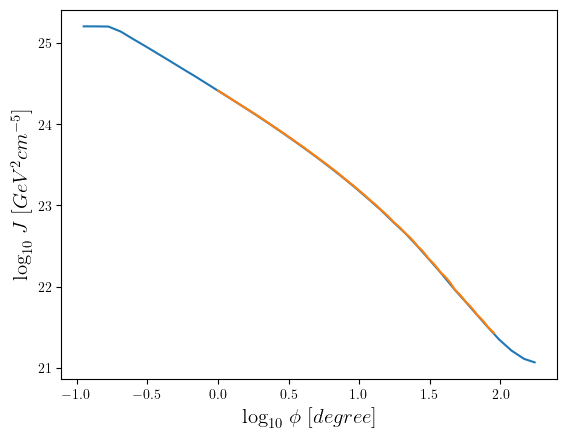

In [79]:
plt.plot(np.log10(J_ice[:,0]), np.log10(J_ice[:,1] * 3.086e21))
plt.plot(np.log10(theta), np.log10(J_ice_  ))
plt.ylabel(r'$\log_{10}$ $J$ $[GeV^{2} cm^{-5}]$', fontsize=fontsize)
plt.xlabel(r'$\log_{10}$ $\phi$ $[degree]$', fontsize=fontsize)

In [80]:
# Grids
mass_grid = config['simulation parameters']['mass grid']
sv_grid = config['simulation parameters']['sv grid']
m_4_id = find_nearest(mass_grid, 1e4)
m_6_id = find_nearest(mass_grid, 1e6)
m_3_id = find_nearest(mass_grid, 1e3)
m_5_id = find_nearest(mass_grid, 1e5)
sv_56 = find_nearest(sv_grid, 3e-26)
# The limit calculation


In [81]:
dphi_2=np.loadtxt(open("../data/m_1e2.csv"), delimiter = ",")
dphi_2[dphi_2[:,0].sort()]

dphi_3_tau=np.loadtxt(open("../data/moline_1_tau.csv"), delimiter = ",")
dphi_3_tau[dphi_3_tau[:,0].sort()]

dphi_3_b = np.loadtxt(open("../data/moline_1_bb.csv"), delimiter = ",")
dphi_3_b[dphi_3_b[:,0].sort()]


dphi_4=np.loadtxt(open("../data/m_1e4.csv"), delimiter = ",")
dphi_4[dphi_4[:,0].sort()]

dphi_6 = np.loadtxt(open("../data/m_1e6.csv"), delimiter = ",")
dphi_6[dphi_6[:,0].sort()]
#dphi_ice=np.loadtxt(open("../data/icecube.csv"), delimiter = ",")
#dphi_ice[dphi_ice[:,0].sort()]

dphi_2_km = np.loadtxt(open("../data/km3_numu.csv"), delimiter = ",")
dphi_2[dphi_2[:,0].sort()]

array([[[1.07967921e-01, 3.44304933e-07],
        [1.90484352e-01, 2.60733160e-07],
        [3.36065456e-01, 1.96956897e-07],
        [5.92909546e-01, 1.47310508e-07],
        [1.04605137e+00, 1.12109637e-07],
        [1.66451479e+00, 1.20520743e-07],
        [2.15457920e+00, 2.94457805e-07],
        [2.45131919e+00, 6.15486001e-07],
        [2.78892777e+00, 1.25185552e-06],
        [3.34110119e+00, 2.61667219e-06],
        [4.21460573e+00, 5.15056005e-06],
        [6.36907905e+00, 9.99820973e-06],
        [1.12367627e+01, 1.45450441e-05],
        [1.98246613e+01, 1.86897263e-05],
        [3.15457185e+01, 3.12774451e-05],
        [4.19008379e+01, 6.25701428e-05],
        [5.15089327e+01, 1.21324857e-04],
        [5.73114978e+01, 8.09386054e-04],
        [6.67076781e+01, 2.62183074e-04],
        [6.67076781e+01, 2.62183074e-04],
        [7.38128320e+01, 4.02393691e-04],
        [8.16747685e+01, 5.54863359e-04],
        [9.56890142e+01, 1.05500815e-03],
        [1.00000000e+02, 1.8022455

In [82]:
dphi_4=UnivariateSpline(dphi_4[:,0],dphi_4[:,1],k=1,s=0,ext=1)
#mass_grid[0],sv_grid[-1],mass_grid[-1],sv_grid[-1]
#dphi_ic=UnivariateSpline(dphi_ice[:,0],dphi_ice[:,1],k=1,s=0,ext=1)
dphi_6=UnivariateSpline(dphi_6[:,0],dphi_6[:,1],k=1,s=0, ext=1)
#dphi_2=UnivariateSpline(dphi_2[:,0],dphi_2[:,1],k=1,s=0, ext=1)


In [83]:


shower_flux = pickle.load(open('../data/shower.p','rb'))
shower_po = shower_flux[2][45]['numu']
surface_fluxe_ice = pickle.load(open("../data/surf_store_v1.p", "rb"))
shower_ice = surface_fluxe_ice[20][3] # background fluxes at 20° ----



In [84]:
np.logspace(2,6,53)[26]
sv_7 = find_nearest(sv_grid, 1e-27)
m_2_id = find_nearest(mass_grid, 1e2)

In [85]:
#dm2nu.m_keysnfw_flux_2 = (dm2nu.extra_galactic_flux_c(e_grid,mass_grid[m_2_id],sv_grid[sv_7]))
#----------------------------------------------------------------------------------------------------
# 'All' channel or "\\[Nu]\\[Mu]" 
#config['general']['detector'] = 'POne'
#config['general']['pone type'] = 'old'
#config['general']['density'] = "NFW" # "Burkert" # 'NFW'
#config['pone']['smearing'] = 'unsmeared'
#config['general']["channel"] = "All" 
#config['general']['sigma_model'] = 'lopez'
#config['pone']['low E sigma'] = {'numu': 0.25,
#                                 'nue': 0.25,
 #                                'nutau': 0.25}
#config['pone']['high E sigma'] = {'numu': 0.15,
#                                 'nue': 0.07,
#                                 'nutau': 0.07}#

#dm2nu = DM2Nu()
#

#--------------------------------------------------------------------------------------------------
#tau tau channel

#config['general']["channel"] = "\[Tau]" 
#config['pone']['smearing'] = 'unsmeared'
#config['general']['sigma_model'] = 'prada'

#dm2nu_ex = DM2Nu()
#nfw_flux_4_ex = (dm2nu_ex.extra_galactic_flux_c(e_grid,mass_grid[m_4_id],sv_grid[sv_56]))# + dm2nu.galactic_flux(e_grid,mass_grid[m_4_id],sv_grid[sv_56], 2 , 2.3e23)
#nfw_flux_6_ex = (dm2nu.extra_galactic_flux_c(e_grid,mass_grid[m_6_id],sv_grid[sv_56]))

In [86]:

#--------------------------------------------------------------------------------------------------
nfw_flux_3_ex_tau = (dm2nu.extra_galactic_flux_c(e_grid,mass_grid[m_3_id],sv_grid[sv_56]))# + dm2nu.galactic_flux(e_grid,mass_grid[m_3_id],sv_grid[sv_56], 2 , 2.3e23)
nfw_flux_3_ex_b = (dm2nu_ex.extra_galactic_flux_c(e_grid,mass_grid[m_3_id],sv_grid[sv_56]))# + dm2nu.galactic_flux(e_grid,mass_grid[m_4_id],sv_grid[sv_56], 2 , 2.3e23)
#nfw_flux_6_ex = (dm2nu.extra_galactic_flux_c(e_grid,mass_grid[m_6_id],sv_grid[sv_56]))

/home/kruteesh/Desktop/DM_nu_simulation/pone_dm/pone_dm/dm2nu.py:314: RuntimeWarning: invalid value encountered in divide
  return ((c_arr**3) * (1 - (1 + c_arr)**(-3)) /
/home/kruteesh/Desktop/DM_nu_simulation/pone_dm/pone_dm/dm2nu.py:423: RuntimeWarning: overflow encountered in power
  return 10**(a * np.log10(M_200_grid * self._const.h) + b)


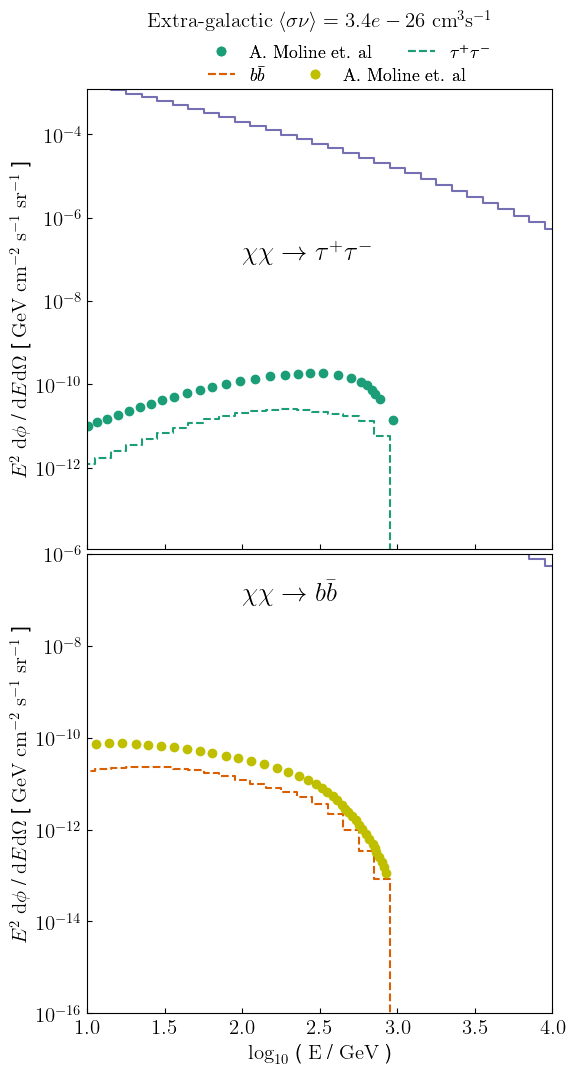

In [87]:
from asyncio import constants

fig = plt.figure( figsize=(std_size,std_size+std_size))
gs = fig.add_gridspec(2, hspace=0.01) 
(ax1,ax2) = gs.subplots(sharex=True)

ax1.set_title(r'$\textrm{Extra-galactic}$ $\left \langle\sigma\nu\right \rangle = %.1e$  $\textrm{cm}^{3}\textrm{s}^{-1}$' % (sv_grid[sv_56]), y=1.12, fontsize=fontsize)
ax1.step(np.log10(e_grid), (shower_po)*e_grid**2, color=color_pone)#, label=r'$\textrm{P}$-$\textrm{ONE}$ [ $\textrm{MCEq}$ ]') # Karlsruhe Corsika
ax2.step(np.log10(e_grid), (shower_po)*e_grid**2, color=color_pone) # Karlsruhe Corsika

ax1.step(np.log10(dphi_3_tau[:,0]), dphi_3_tau[:,1], 'o', color=color_4, label=r'$\textrm{A. Moline et. al}$')
#
ax1.step(np.log10(e_grid), nfw_flux_3_ex_tau * e_grid**2, '--', color=color_4, label=r'$\tau^{+}\tau^{-}$'
        )
#ax1.step(np.log10(e_grid), nfw_flux_5 * e_grid**2., '*', color='b',
#         )
ax2.step(np.log10(e_grid), nfw_flux_3_ex_b * e_grid**2, '--', color=color_6, label=r'$b\bar{b}$'  # type: ignore
         )
ax2.step(np.log10(dphi_3_b[:,0]), dphi_3_b[:,1],'o', color="y", label=r'$\textrm{A. Moline et. al}$')

#ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel(r'$\log_{10}$ ( $\textrm{E}$ / $\textrm{GeV}$ )', fontsize=fontsize)
ax1.set_ylabel(r'\textbf{$E^2$} $\textrm{d}$\textbf{$\phi$} / \textrm{d}\textbf{$E$}\textrm{d}$\Omega$   [ $\textrm{GeV}$ $\textrm{cm}^{-2}$ $\textrm{s}^{-1}$ $\textrm{sr}^{-1}$ ]', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')

ax2.set_yscale("log")
ax2.set_xlabel(r'$\log_{10}$ ( $\textrm{E}$ / $\textrm{GeV}$ )', fontsize=fontsize)
ax2.set_ylabel(r'\textbf{$E^2$} $\textrm{d}$\textbf{$\phi$} / \textrm{d}\textbf{$E$}\textrm{d}$\Omega$   [ $\textrm{GeV}$ $\textrm{cm}^{-2}$ $\textrm{s}^{-1}$ $\textrm{sr}^{-1}$ ]', fontsize=fontsize)
ax2.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax2.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')

ax1.set_xlim(1, 4)

ax1.set_ylim(1.1e-14,1.2e-3)
ax2.set_ylim(1e-16, 1e-6)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(0.9, +1.08),
                 ncol=3, fontsize=fontsize-2, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)
h_, l_ = ax2.get_legend_handles_labels()
lgd2 = ax2.legend(h_, l_, loc=7, bbox_to_anchor=(0.85, +2.04),
                 ncol=3, fontsize=fontsize-2, handlelength=h_length,
                 fancybox=True, frameon=False)
ax2.add_artist(lgd2)

ax2.text(2, 1e-7, r'$\chi\chi \rightarrow  b\bar{b}$', fontsize=fontsize+4)
ax1.text(2, 1e-7, r'$\chi\chi \rightarrow \tau^{+}\tau^{-}$', fontsize=fontsize+4)

fig.savefig(PICS + "Final_flux"+".png",
               bbox_inches='tight', dpi=export_dpi, facecolor='white')

In [88]:
M_grid = np.logspace(5, 19, 150)
MdndM = dm2nu.M_dndM(M_grid, z=0)

In [89]:
abs(MdndM)

array([6.25015327e-007, 5.03983254e-007, 4.06404436e-007, 3.27731635e-007,
       2.64299662e-007, 2.13154220e-007, 1.71913963e-007, 1.38659330e-007,
       1.11842962e-007, 9.02174964e-008, 7.27773783e-008, 5.87119622e-008,
       4.73677130e-008, 3.82177405e-008, 3.08372441e-008, 2.48837211e-008,
       2.00810135e-008, 1.62064484e-008, 1.30804732e-008, 1.05582993e-008,
       8.52316721e-009, 6.88091610e-009, 5.55560693e-009, 4.48599333e-009,
       3.62267659e-009, 2.92581186e-009, 2.36325879e-009, 1.90909040e-009,
       1.54239076e-009, 1.24628551e-009, 1.00716008e-009, 8.14029293e-010,
       6.58028953e-010, 5.32005860e-010, 4.30187129e-010, 3.47913491e-010,
       2.81424178e-010, 2.27683411e-010, 1.84240425e-010, 1.49116562e-010,
       1.20714172e-010, 9.77431248e-011, 7.91615093e-011, 6.41277867e-011,
       5.19621806e-011, 4.21155181e-011, 3.41440832e-011, 2.76893193e-011,
       2.24614464e-011, 1.82262358e-011, 1.47943322e-011, 1.20126338e-011,
       9.75733064e-012, 7

In [90]:
MdndM_lit=np.loadtxt(open("../data/MdndM_moline.csv"), delimiter = ",")
MdndM_lit[MdndM_lit[:,0].sort()]

array([[[6.98692794e+07, 1.26152375e-03],
        [1.12074431e+08, 1.29787202e-03],
        [1.64098679e+08, 1.36635980e-03],
        [2.39710845e+08, 1.50549433e-03],
        [3.65222259e+08, 1.80072147e-03],
        [5.56450829e+08, 2.32655739e-03],
        [8.47805732e+08, 2.86052275e-03],
        [1.29171262e+09, 3.70398972e-03],
        [1.96804697e+09, 4.60708664e-03],
        [2.99850663e+09, 5.93604503e-03],
        [4.56850988e+09, 7.61891280e-03],
        [7.25990736e+09, 1.07272547e-02],
        [1.10611590e+10, 1.37078749e-02],
        [1.73731046e+10, 1.73480596e-02],
        [2.62230511e+10, 1.87110186e-02],
        [3.91209416e+10, 2.37169083e-02],
        [6.14449365e+10, 2.72227715e-02],
        [9.85612898e+10, 2.94129441e-02],
        [1.44312822e+11, 2.88141103e-02],
        [2.17317532e+11, 3.21078554e-02],
        [3.28020172e+11, 3.40966950e-02],
        [5.04468293e+11, 3.88273559e-02],
        [7.61446968e+11, 3.89416187e-02],
        [1.17104338e+12, 4.3456843

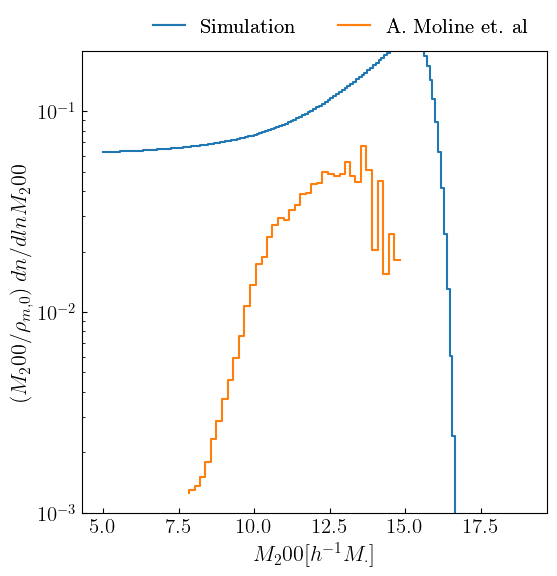

In [91]:

figure, (ax1) = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True)

ax1.step(np.log10(M_grid), abs(MdndM)*M_grid, label=r'$\textrm{Simulation}$')
ax1.step(np.log10(MdndM_lit[:,0]), MdndM_lit[:,1], label=r'$\textrm{A. Moline et. al}$')

h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(1.0, +1.051),
             ncol=2, fontsize=fontsize, handlelength=h_length,
             fancybox=True, frameon=False)
ax1.add_artist(lgd1)
#ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel(r"$M_200 [h^{-1} M_{\cdot}]$", fontsize=fontsize+1)
ax1.set_ylabel(r"$(M_200 / \rho_{m,0})$ $dn/dln M_200$", fontsize=fontsize+1)
#ax1.text(3.1, -25.3, r'$\chi\chi \rightarrow \nu_{\mu}\bar{\nu}_{\mu}$', fontsize=fontsize+4)
#ax1.text(3.1, -24.9, r'$\textrm{NFW}$', fontsize=fontsize+2)
#ax1.tick_params(axis = 'both', which='major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which='major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
#ax1.set_xlim(2.9, max(np.log10(mass_grid)))
ax1.set_ylim(1e-3, 2e-1)  # min(np.log10(sv_grid)), -21
figure.savefig('../pics/Limits_result_ice_cmap.png',bbox_inches='tight', dpi=export_dpi, facecolor='white')
plt.show()

In [92]:
#         label=r'$m_{x}$ = %.1e , $<\sigma\nu>$ = %.1eGeV Sim'%(mass_grid[0],sv))
burkert_flux_4 = (dm2nu.extra_galactic_flux_burkert(e_grid,mass_grid[m_4_id],sv_grid[sv_56]))# + dm2nu_dm_nu.galactic_flux(e_grid,mass_grid[m_4_id],sv_grid[sv_56], 2 , 2.3e23)
burkert_flux_6 = (dm2nu.extra_galactic_flux_burkert(e_grid,mass_grid[m_6_id],sv_grid[sv_56]))# + dm2nu.galactic_flux(e_grid,mass_grid[m_6_id],sv_grid[sv_56], 2 , 2.3e23)
#nfw_flux_2 = (dm2nu.extra_galactic_flux_nfw(e_grid,mass_grid[m_2_id],sv_grid[sv_7]))
#nfw_flux_3 = (dm2nu.extra_galactic_flux_nfw(e_grid,mass_grid[m_3_id],sv_grid[sv_56]))# + dm2nu.galactic_flux(e_grid,mass_grid[m_3_id],sv_grid[sv_56], 2 , 2.3e23)
#nfw_flux_4 = (dm2nu.extra_galactic_flux_nfw(e_grid,mass_grid[m_4_id],sv_grid[sv_56]))# + dm2nu.galactic_flux(e_grid,mass_grid[m_4_id],sv_grid[sv_56], 2 , 2.3e23)
#nfw_flux_6 = (dm2nu.extra_galactic_flux_nfw(e_grid,mass_grid[m_6_id],sv_grid[sv_56]))# + dm2nu.galactic_flux(e_grid,mass_grid[m_6_id],sv_grid[sv_56], 2 , 2.3e23)
#nfw_flux_5 = (dm2nu.extra_galactic_flux_nfw(e_grid,mass_grid[m_5_id],sv_grid[sv_7])) + dm2nu.galactic_flux(e_grid,mass_grid[m_5_id],sv_grid[sv_56], 2 , 2.3e23)
#ax1.step(np.log10(e_grid), burkert_flux_4 * e_grid**2., color=color_4, linest

nfw_flux_2_g = dm2nu.galactic_flux_c(e_grid,mass_grid[m_2_id],sv_grid[sv_56], 2 , 2.3e23)
nfw_flux_3_g = dm2nu.galactic_flux_c(e_grid,mass_grid[m_3_id],sv_grid[sv_56], 2 , 2.3e23)
nfw_flux_4_g = dm2nu.galactic_flux_c(e_grid,mass_grid[m_4_id],sv_grid[sv_56], 2 , 2.3e23)
nfw_flux_6_g = dm2nu.galactic_flux_c(e_grid,mass_grid[m_6_id],sv_grid[sv_56], 2 , 2.3e23)
nfw_flux_5_g = dm2nu.galactic_flux_c(e_grid,mass_grid[m_5_id],sv_grid[sv_56], 2 , 2.3e23)


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_4566/3466807482.py", line 2, in <cell line: 2>
    burkert_flux_4 = (dm2nu.extra_galactic_flux_burkert(e_grid,mass_grid[m_4_id],sv_grid[sv_56]))# + dm2nu_dm_nu.galactic_flux(e_grid,mass_grid[m_4_id],sv_grid[sv_56], 2 , 2.3e23)
AttributeError: 'DM2Nu' object has no attribute 'extra_galactic_flux_burkert'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/executing/executing.py", line 317, in executing
    args = executing_cache[key]
KeyError: (<code object run_code at 0x7effe40ba760, file "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3362>, 139637507729248, 76)

Durin

In [93]:
#pickle.dump(nfw_flux_2, open('../../../fluxes/Extra_galactic/tau/z_5/nfw_1e2.pkl', 'wb'))
#pickle.dump(nfw_flux_3, open('../../../fluxes/Extra_galactic/tau/z_5/nfw_1e3.pkl', 'wb'))
#pickle.dump(nfw_flux_4, open('../../../fluxes/Extra_galactic/tau/z_5/nfw_1e4.pkl', 'wb'))
#pickle.dump(nfw_flux_5, open('../../../fluxes/Extra_galactic/tau/z_5/nfw_1e5.pkl', 'wb'))


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_4566/3436491816.py", line 12, in <cell line: 12>
    plt.step(np.log10(dphi_3[:,0]), dphi_3[:,1], 'o', color='k')
NameError: name 'dphi_3' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/executing/executing.py", line 317, in executing
    args = executing_cache[key]
KeyError: (<code object run_code at 0x7effe40ba760, file "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3362>, 139637507729248, 76)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/kruteesh/miniconda3/envs/pdm/lib/pytho

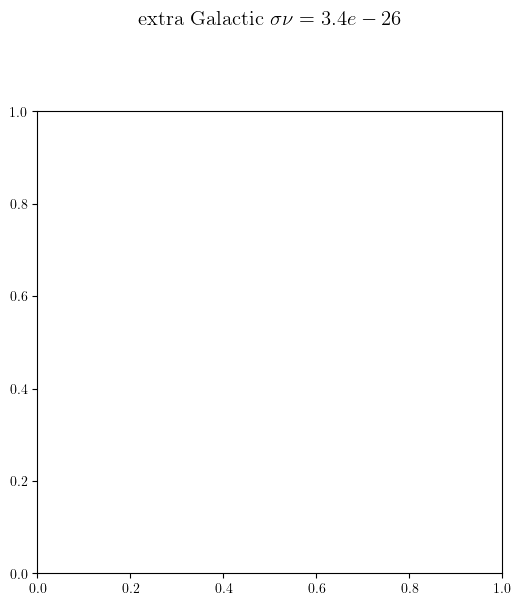

In [94]:
from asyncio import constants


figure, ax1 = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True) 
#  $<\sigma\nu>=%.1e$ $cm^{3}s^{-1}$' ,sv_grid[sv_56]
#label=r'$m_{x}=1.0e+04$ $\textrm{GeV} (Carlos$ $et.al)$'
#label=r'$m_{x}=1.0e+06$ $\textrm{\textrm{\textrm{GeV}}} (Carlos$ $et.al)$'
ax1.set_title(r'$\textrm{extra Galactic}$ $\sigma\nu = %.1e$' % (sv_grid[sv_56]), y=1.17, fontsize=fontsize)
#ax1.step(np.log10(e_grid), dphi_2(e_grid),'o', color="y")
#plt.step(np.log10(e_grid), dphi_4(e_grid), 'o', color=color_4)
#plt.step(np.log10(e_grid), dphi_6(e_grid), 'o',color=color_6)
plt.step(np.log10(dphi_3[:,0]), dphi_3[:,1], 'o', color='k')
#plt.step(np.log10(dphi_2_km[:,0]), dphi_2_km[:,1], '*',color=color_4)
#ax1.step(e_grid, (dm2nu_dm_nu.extra_galactic_flux(e_grid,mass_grid[0],sv)) * e_grid**2.,'-.',

#ax1.step([0],[0],':' , lw=1.7, color='k', label=r'$\textrm{Burkert Profile}$' )
#plt.plot([0],[0],'o', color='k', label=r'$\textrm{A. Moline et. al.}$' )
#plt.plot([0],[0],'*', color='k', label=r'$\textrm{L.S. Miranda et. al. (KM3NeT)}$' )
# 4*pi factor from now on is because of the plot y axis not being diffused meaning the d\Omega integral hasnt been done ------------------------
#ax1.step(np.log10(e_grid), burkert_flux_4 * e_grid**2 , ':', color=color_4, lw=2.1
#         )
#ax1.step(np.log10(e_grid), burkert_flux_6 * e_grid**2, ':', color=color_6, lw=2.1
#         )
ax1.step([0],[0],'--', color='k', label=r'$\textrm{Simulation}$' )
#ax1.plot(np.log10(e_grid), nfw_flux_2 * e_grid**2, '.', color=color_4
 #       )
#ax1.step(np.log10(e_grid), nfw_flux_5 * e_grid**2., '*', color='b',
#         )
ax1.plot(np.log10(e_grid), nfw_flux_3_ex * e_grid**2 / (4*np.pi), '--', color=color_6  # type: ignore
         )
ax1.step(np.log10(e_grid), (shower_po)*e_grid**2, color=color_pone, label=r'$\textrm{P}$-$\textrm{ONE}$ [ $\textrm{MCEq}$ ]') # Karlsruhe Corsika
# ax1.step(np.log10(e_grid), (shower_ice + pdm._Detector.astro_flux())*e_grid**2, color=color_ice, label=r'IceCube')
#ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel(r'$\log_{10}$ ( $\textrm{E}$ / $\textrm{GeV}$ )', fontsize=fontsize)
ax1.set_ylabel(r'\textbf{$E^2$} $\textrm{d}$\textbf{$\phi$} / \textrm{d}\textbf{$E$}\textrm{d}$\Omega$   [ $\textrm{GeV}$ $\textrm{cm}^{-2}$ $\textrm{s}^{-1}$ $\textrm{sr}^{-1}$ ]', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax1.set_xlim(0.1, 2.9)
ax1.set_ylim(1.1e-15,1.2e-2)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(0.95, +1.1),
                 ncol=2, fontsize=fontsize-2, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)
legend_elements_s = [
        #Line2D([0], [0], color='y', linestyle='-', lw=1.3),
        #Line2D([0], [0], color=color_4,linestyle='-',lw=1.3),
        #Line2D([0], [0], color=color_4,linestyle='-',lw=1.7),
        #Line2D([0], [0], color='b', linestyle='-', lw=1.3),
        Line2D([0], [0], color=color_6, linestyle='-', lw=1.7)
                  ]
labels_s = [
        #r'$m_{x}=%.1e$ $\textrm{GeV}$ ' %(mass_grid[m_2_id]),
        #r'$m_{x}=%.1e$ $\textrm{GeV}$ ' %(mass_grid[m_2_id]),
        #r'$m_{x}=%.1e$ $\textrm{GeV}$ ' %(mass_grid[m_2_id]),
        #r'$m_{x}=%.1e$ $\textrm{GeV}$ ' %(mass_grid[m_5_id]),
        r'$m_{x}=%.1e$ $\textrm{GeV}$ ' %(mass_grid[m_3_id])
          ]
lgd2 = ax1.legend(legend_elements_s, labels_s, loc=7, bbox_to_anchor=(1.01, +0.1),
             ncol=1, fontsize=fontsize-2, handlelength=h_length,
             fancybox=True, frameon=False)
ax1.add_artist(lgd2)
ax1.text(2.1, 3e-6, r'$\chi\chi \rightarrow \tau^{+}\tau^{-}$', fontsize=fontsize+4)
ax1.text(2.1, 1e-7, r'$\textrm{NFW}$', fontsize=fontsize+2)
# ---------------------------------------------
# Showing the image

plt.show()
figure.savefig(PICS + "Final_flux"+".png",
               bbox_inches='tight', dpi=export_dpi, facecolor='white')

In [95]:
det = Detector(aeff=Aeff())
sig = Signal(Aeff(), dm2nu, det)
from constants import pdm_constants as const

POne


In [96]:
con_ = const()

In [97]:
flux={}
J_s = [con_.J_s1, con_.J_s2, con_.J_s3 ]
for i,a in enumerate([15, 85, 120]):
    flux[a] = {}
    flux[a]['numu'] = dm2nu.galactic_flux_c(e_grid,mass_grid[m_4_id],sv_grid[sv_7], 2 , J_s[i])
    flux[a]['nue'] = dm2nu.galactic_flux_c(e_grid,mass_grid[m_4_id],sv_grid[sv_7], 2 , J_s[i])
    flux[a]['nutau'] = dm2nu.galactic_flux_c(e_grid,mass_grid[m_4_id],sv_grid[sv_7], 2 , J_s[i])
sig_ = det.simdec_Pone(flux, boolean_sig=True)

In [98]:
sig_sig_calc = sig.signal_calc_pone(e_grid, 1e4, 1e-23)

In [99]:
background_ic = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/28_03_desk/data/background_ice.pkl','rb'))
back_ice_ob = pickle.load(open('../data/tmp_files/background_ice_data_total.pkl','rb'))

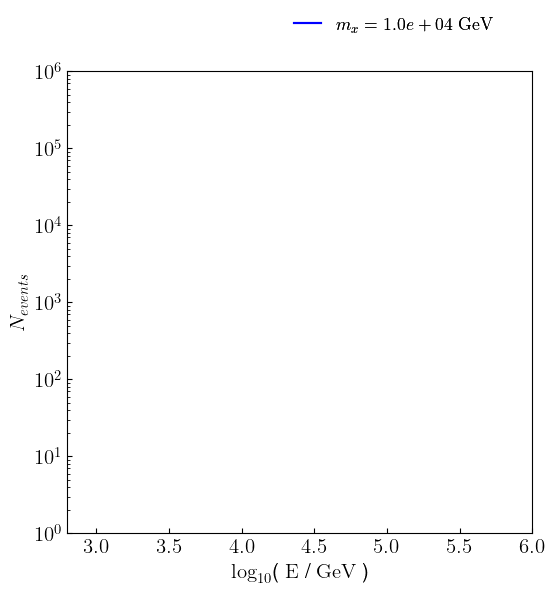

In [100]:
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True) 
##ax1 = fig.add_gridspec(2, 1, hspace=0.06, wspace=0.05)
##(ax1) = gs.subplots( sharex=True, sharey=True)
#
#
ax1.step(np.log10(e_grid), sig_['numu'], color='b', linestyle='-',
         label=r'$m_{x}=%.1e$ $\textrm{GeV}$' % (mass_grid[m_4_id]))
#ax1.step(np.log10(e_grid), sig_sig_calc['numu'], color='b', linestyle='--',
#         label=r'$m_{x}=%.1e$ $\textrm{GeV}$' % (mass_grid[m_4_id]))
#ax1.step(np.log10(e_grid[-len(sig_[sv_56][m_3_id]):]), sig_[5][m_4_id], color=color_4, linestyle='-',
#         label=r'$m_{x}=%.1e$ $\textrm{GeV}$' % (mass_grid[m_4_id]))
#ax1.step(np.log10(e_grid[-len(sig_[sv_56][m_3_id]):]), sig_[5][m_6_id], color=color_6, linestyle='-',
#         label=r'$m_{x}=%.1e$ $\textrm{GeV}$' % (mass_grid[m_6_id]))
#

#ax1.step(np.log10(e_grid), np.sum(background_ic['numu'], axis=0), '-', color=color_ice, label=r'$\textrm{IceCube Observed}$')

ax1.set_yscale("log")
ax1.set_xlabel(r'$\log_{10}$( $\textrm{E}$ / $\textrm{GeV}$ )', fontsize=fontsize)
ax1.set_ylabel(r'$N_{events}$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax1.set_xlim(2.8, 6)
ax1.set_ylim(1e0,1e6)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(0.95, +1.1),
                 ncol=2, fontsize=fontsize-2, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)

plt.show()
#figure.savefig(PICS + "Final_signal_ice"+".png",
#               bbox_inches='tight', dpi=export_dpi, facecolor='white')

In [101]:
config['general']['detector'] = 'IceCube'
config['general']['pone type'] = 'old'
config['general']['density'] = "NFW" # "Burkert" # 'NFW'
config['general']["channel"] = 'All' # '\[Tau]'  # "\\[Nu]\\[Mu]" 
config['pone']['smearing'] = 'unsmeared'
config['general']['sigma_model'] = 'prada'


det = Detector(aeff=Aeff())
sig = Signal(Aeff(), dm2nu, det)
from constants import pdm_constants as const

ICeCube... Effective Areas
Loading Effective Area


In [ ]:
#sig_ice_ = sig.signal_calc_ice(e_grid, mass_grid[0], sv_grid[0])

In [ ]:
print(sig_ice_)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_4566/747885648.py", line 1, in <cell line: 1>
    print(sig_ice_)
NameError: name 'sig_ice_' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/executing/executing.py", line 317, in executing
    args = executing_cache[key]
KeyError: (<code object run_code at 0x7effe40ba760, file "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3362>, 139637507729248, 76)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/IPython/core/interactivesh

In [ ]:
#sig_server_ice = pickle.load(open('/home/kruteesh/Desktop/server_com_dm/pone_dm/data/flux_100.000000_0.000000.pkl','rb'))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_4566/3632459045.py", line 6, in <cell line: 6>
    ax1.step(np.log10(e_grid), sig_ice_[0], color='b', linestyle='-',
NameError: name 'sig_ice_' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/executing/executing.py", line 317, in executing
    args = executing_cache[key]
KeyError: (<code object run_code at 0x7effe40ba760, file "/home/kruteesh/miniconda3/envs/pdm/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3362>, 139637507729248, 76)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/kruteesh/miniconda3/envs/pdm/lib/

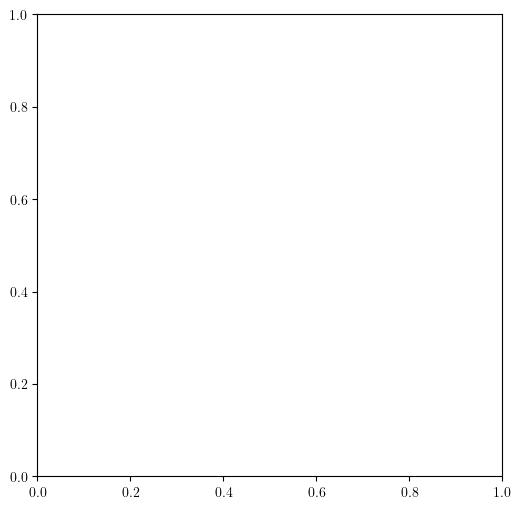

In [ ]:
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True) 
##ax1 = fig.add_gridspec(2, 1, hspace=0.06, wspace=0.05)
##(ax1) = gs.subplots( sharex=True, sharey=True)
#
#
ax1.step(np.log10(e_grid), sig_ice_[0], color='b', linestyle='-',
         label=r'$m_{x}=%.1e$ $\textrm{GeV}$' % (mass_grid[m_4_id]))
#ax1.step(np.log10(e_grid), sig_sig_calc['numu'], color='b', linestyle='--',
#         label=r'$m_{x}=%.1e$ $\textrm{GeV}$' % (mass_grid[m_4_id]))
#ax1.step(np.log10(e_grid[-len(sig_[sv_56][m_3_id]):]), sig_[5][m_4_id], color=color_4, linestyle='-',
#         label=r'$m_{x}=%.1e$ $\textrm{GeV}$' % (mass_grid[m_4_id]))
#ax1.step(np.log10(e_grid[-len(sig_[sv_56][m_3_id]):]), sig_[5][m_6_id], color=color_6, linestyle='-',
#         label=r'$m_{x}=%.1e$ $\textrm{GeV}$' % (mass_grid[m_6_id]))
#

#ax1.step(np.log10(e_grid), np.sum(background_ic['numu'], axis=0), '-', color=color_ice, label=r'$\textrm{IceCube Observed}$')

ax1.set_yscale("log")
ax1.set_xlabel(r'$\log_{10}$( $\textrm{E}$ / $\textrm{GeV}$ )', fontsize=fontsize)
ax1.set_ylabel(r'$N_{events}$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax1.set_xlim(2.8, 6)
ax1.set_ylim(1e0,1e6)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(0.95, +1.1),
                 ncol=2, fontsize=fontsize-2, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)

plt.show()
#figure.savefig(PICS + "Final_signal_ice"+".png",
#               bbox_inches='tight', dpi=export_dpi, facecolor='white')